In [1]:
import json

In [2]:
with open('repository_statistics_20231012_commit.json') as commit_file:
    repository_statistics_commit = json.load(commit_file)

In [3]:
with open('repository_statistics_20231012_pr.json') as pr_file:
    repository_statistics_pr = json.load(pr_file)

In [4]:
import pandas as pd

In [5]:
commit_df = pd.DataFrame.from_dict(repository_statistics_commit, orient='index')

In [6]:
pr_df = pd.DataFrame.from_dict(repository_statistics_pr, orient='index')

In [7]:
all_df = pd.concat([commit_df, pr_df])

In [8]:
all_df.shape

(286, 2)

In [9]:
tmp = all_df.reset_index()

In [10]:
tmp

,index,author_number,commit_number
0,grnpin/textbox,3,84
1,bh679/MindfulAI2.0,1,87
2,4lejandrito/fetchbook,1,83
3,changchiyou/Github-Action-Test,1,114
4,waylon620/GPT-tutor,7,85
...,...,...,...
281,simonw/llm,16,441
282,decred/dcrdex,46,1776
283,rust-lang/rfcs,415,6091
284,MatrixAI/Polykey,20,1602


In [9]:
index = all_df.index.drop_duplicates(keep='first')

In [10]:
all_df = all_df.loc[index]

In [11]:
pr_repositories = pr_df.index.to_list()

In [12]:
commit_repositories = commit_df.index.to_list()

In [15]:
len(pr_repositories)

210

In [16]:
len(commit_repositories)

76

In [17]:
len(all_df.index.to_list())

286

In [18]:
both = set(pr_repositories).intersection(set(commit_repositories))

In [19]:
list(both)

['TurboWarp/extensions',
 'poki/netlib',
 'lightward/mechanic-tasks',
 'hoshotakamoto/banzukesurfing',
 'dantebarbieri/pi-picture-frame',
 'brennoflavio/nextcloud-alexa',
 'openai/evals',
 'tisztamo/Junior',
 'PrivateBin/PrivateBin',
 'temporalio/temporal',
 'labd/terraform-provider-storyblok']

In [20]:
all_df.loc['tisztamo/Junior']

,author_number,commit_number
tisztamo/Junior,6,838
tisztamo/Junior,6,838


In [30]:
all_df = all_df.reset_index()

In [31]:
all_df[all_df['index']=='tisztamo/Junior']

,index,author_number,commit_number
31,tisztamo/Junior,6,838
111,tisztamo/Junior,6,838


In [32]:
all_df = all_df.drop_duplicates()

In [33]:
all_df.shape

(275, 3)

In [34]:
all_df[all_df['index']=='tisztamo/Junior']

,index,author_number,commit_number
31,tisztamo/Junior,6,838


In [36]:
all_df= all_df.set_index('index')

In [37]:
all_df.shape

(275, 2)

In [38]:
all_df['Source'] = 'both'

In [47]:
all_df.loc[pr_repositories,'Source'] = 'pr'

In [52]:
all_df.loc[commit_repositories,'Source'] = 'c'

In [55]:
all_df.loc[list(both),'Source'] = 'b'

In [56]:
all_df[all_df['Source']=='c'].shape

(65, 3)

In [57]:
all_df[all_df['Source']=='pr'].shape

(199, 3)

In [58]:
all_df[all_df['Source']=='b'].shape

(11, 3)

In [59]:
all_df.loc[pr_repositories].shape

(210, 3)

In [60]:
all_df.loc[pr_repositories]['Source']

index
validatorjs/validator.js                     pr
magnifiq/js-practice-vention                 pr
FlorianWoelki/obsidian-symbols-prettifier    pr
asaskevich/govalidator                       pr
rom-py/rompy                                 pr
                                             ..
simonw/llm                                   pr
decred/dcrdex                                pr
rust-lang/rfcs                               pr
MatrixAI/Polykey                             pr
mindee/doctr                                 pr
Name: Source, Length: 210, dtype: object

In [61]:
pr_df.shape

(210, 2)

In [62]:
commit_df.shape

(76, 2)

In [63]:
all_df.shape

(275, 3)

In [64]:
all_df.columns

Index(['author_number', 'commit_number', 'Source'], dtype='object')

In [65]:
all_df['commit_number']

index
grnpin/textbox                      84
bh679/MindfulAI2.0                  87
4lejandrito/fetchbook               83
changchiyou/Github-Action-Test     114
waylon620/GPT-tutor                 85
                                  ... 
simonw/llm                         441
decred/dcrdex                     1776
rust-lang/rfcs                    6091
MatrixAI/Polykey                  1602
mindee/doctr                       774
Name: commit_number, Length: 275, dtype: int64

In [66]:
import matplotlib

<Axes: ylabel='Frequency'>

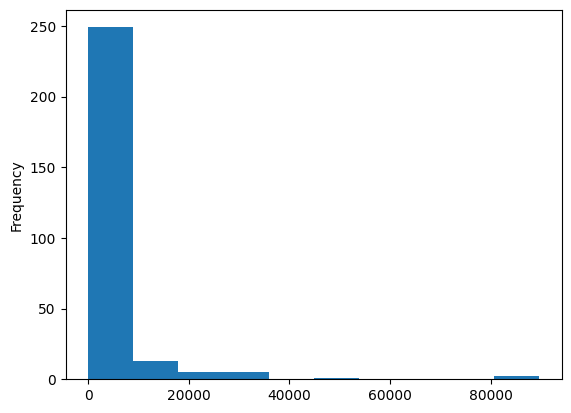

In [67]:
all_df['commit_number'].plot(kind='hist')

<Axes: ylabel='Frequency'>

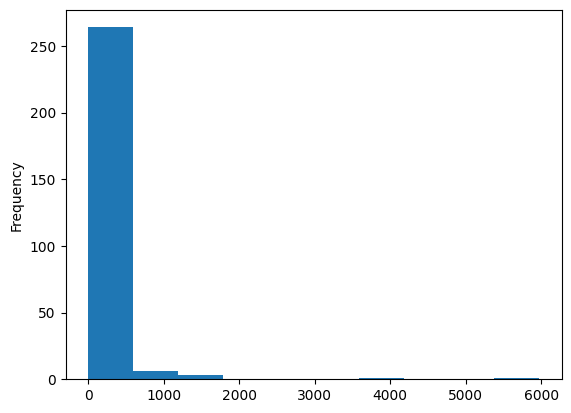

In [68]:
all_df['author_number'].plot(kind='hist')

<Axes: xlabel='index'>

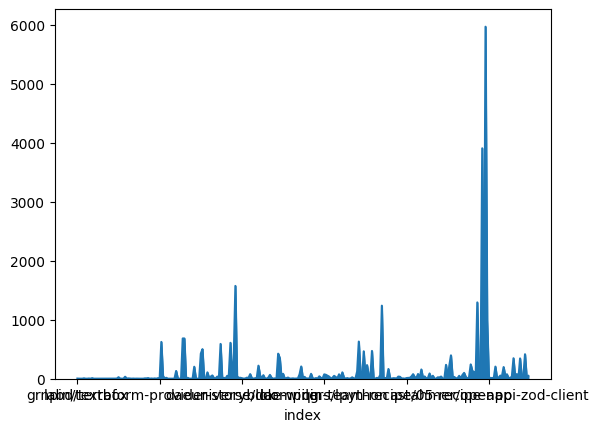

In [69]:
all_df['author_number'].plot(kind='area')

<Axes: xlabel='author_number', ylabel='commit_number'>

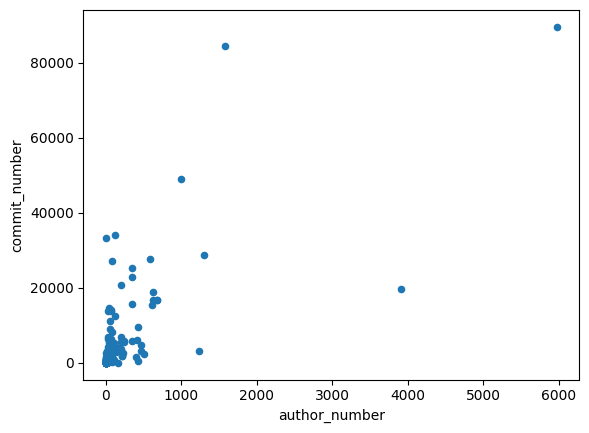

In [70]:
all_df.plot(kind='scatter', x ='author_number', y ='commit_number')

<Axes: xlabel='author_number', ylabel='commit_number'>

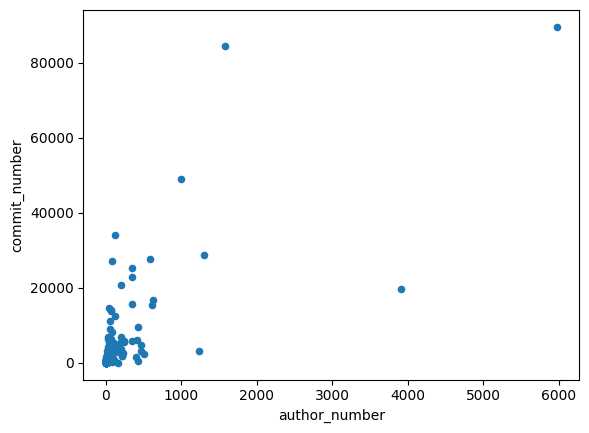

In [71]:
pr_df.plot(kind='scatter', x ='author_number', y ='commit_number')

<Axes: xlabel='author_number', ylabel='commit_number'>

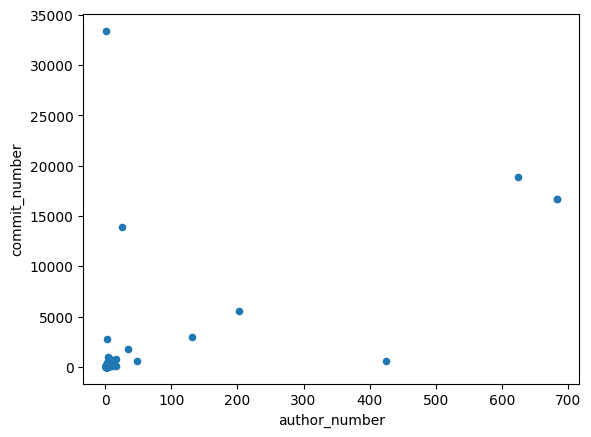

In [72]:
commit_df.plot(kind='scatter', x ='author_number', y ='commit_number')

In [73]:
pr_df.describe()

,author_number,commit_number
count,210.000000,210.000000
mean,133.823810,3703.133333
std,524.790405,10435.828533
min,1.000000,1.000000
25%,5.250000,124.500000
50%,16.500000,580.000000
75%,63.750000,2281.000000
max,5970.000000,89631.000000


In [74]:
commit_df.describe()

,author_number,commit_number
count,76.000000,76.000000
mean,40.157895,1599.671053
std,138.779446,5267.655052
min,1.000000,1.000000
25%,1.000000,16.750000
50%,2.000000,71.000000
75%,5.250000,208.750000
max,683.000000,33415.000000


In [75]:
commit_df['author_number'].idxmax()

'sqlalchemy/sqlalchemy'

In [76]:
commit_df['commit_number'].idxmax()

'Buildstarted/linksfordevs'

In [77]:
pr_df['author_number'].idxmax()

'rails/rails'

In [78]:
pr_df['commit_number'].idxmax()

'rails/rails'

In [80]:
pr_df.head()

,author_number,commit_number
validatorjs/validator.js,502,2221
magnifiq/js-practice-vention,3,5
FlorianWoelki/obsidian-symbols-prettifier,2,30
asaskevich/govalidator,108,588
rom-py/rompy,15,870


<Axes: xlabel='author_number', ylabel='commit_number'>

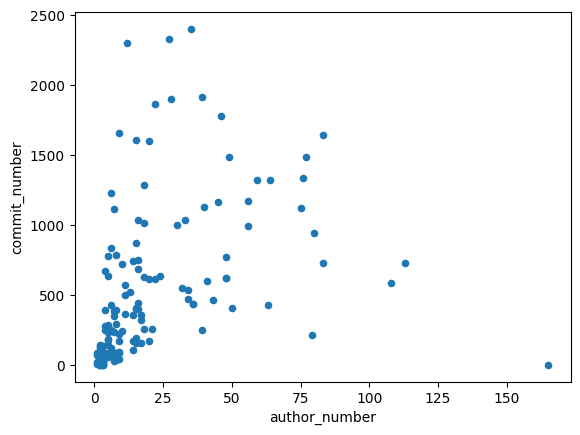

In [82]:
pr_df[(pr_df['author_number']<200)&(pr_df['commit_number']<2500)].plot(kind='scatter', x ='author_number', y ='commit_number')

In [83]:
commit_df[(commit_df['author_number']<100)&(commit_df['commit_number']<250)].describe()

,author_number,commit_number
count,58.000000,58.000000
mean,2.379310,55.482759
std,2.687382,56.519285
min,1.000000,1.000000
25%,1.000000,12.250000
50%,1.000000,33.000000
75%,3.000000,84.750000
max,16.000000,214.000000


<Axes: xlabel='author_number', ylabel='commit_number'>

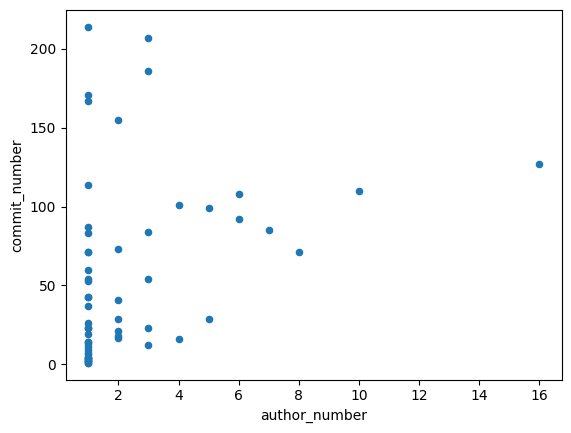

In [84]:
commit_df[(commit_df['author_number']<100)&(commit_df['commit_number']<250)].plot(kind='scatter', x ='author_number', y ='commit_number')

<Axes: xlabel='author_number', ylabel='commit_number'>

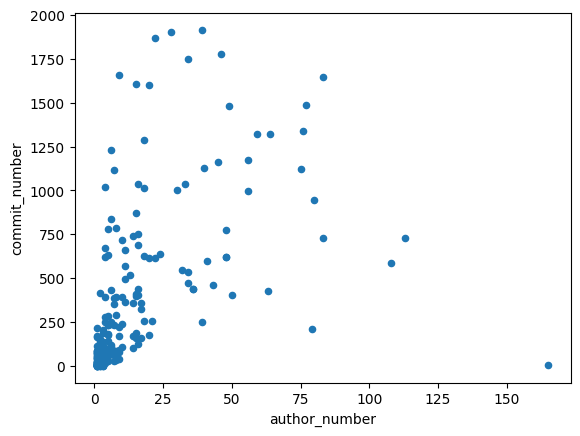

In [85]:
all_df[(all_df['author_number']<200)&(all_df['commit_number']<2000)].plot(kind='scatter', x ='author_number', y ='commit_number')

In [86]:
all_df.describe()

,author_number,commit_number
count,275.000000,275.000000
mean,110.196364,3228.018182
std,465.237438,9553.957136
min,1.000000,1.000000
25%,3.000000,66.500000
50%,9.000000,359.000000
75%,48.000000,1626.500000
max,5970.000000,89631.000000


all_df[(all_df['author_number']<200)&(all_df['commit_number']<2000)].describe()

In [87]:
all_df[(all_df['author_number']<200)&(all_df['commit_number']<2000)].describe()

,author_number,commit_number
count,211.000000,211.000000
mean,14.971564,361.597156
std,23.143839,459.205757
min,1.000000,1.000000
25%,2.000000,40.000000
50%,6.000000,155.000000
75%,16.000000,541.000000
max,165.000000,1915.000000


In [88]:
colors = {'b':'red', 'pr':'green', 'c':'blue'}

In [91]:
all_df['Source_color']=all_df['Source'].map(colors)

<Axes: xlabel='author_number', ylabel='commit_number'>

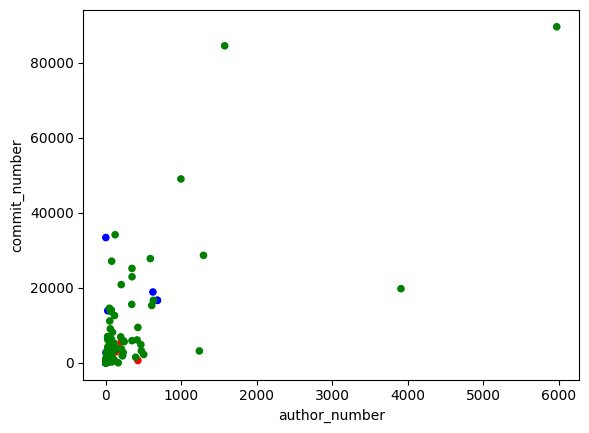

In [93]:
all_df.plot(kind='scatter', x ='author_number', y ='commit_number', c ='Source_color')

<Axes: xlabel='author_number', ylabel='commit_number'>

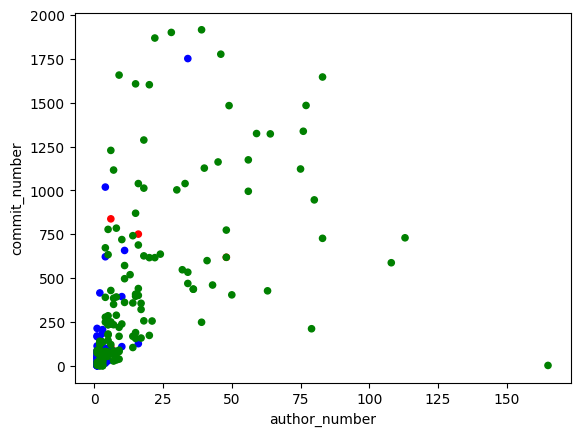

In [95]:
all_df[(all_df['author_number']<200)&(all_df['commit_number']<2000)].plot(kind='scatter', x ='author_number', y ='commit_number', c ='Source_color')

In [96]:
all_df.describe()

,author_number,commit_number
count,275.000000,275.000000
mean,110.196364,3228.018182
std,465.237438,9553.957136
min,1.000000,1.000000
25%,3.000000,66.500000
50%,9.000000,359.000000
75%,48.000000,1626.500000
max,5970.000000,89631.000000


In [97]:
all_df[(all_df['author_number']<200)&(all_df['commit_number']<2000)].describe()

,author_number,commit_number
count,211.000000,211.000000
mean,14.971564,361.597156
std,23.143839,459.205757
min,1.000000,1.000000
25%,2.000000,40.000000
50%,6.000000,155.000000
75%,16.000000,541.000000
max,165.000000,1915.000000
